In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("zomato.csv",encoding="latin-1")

In [3]:
df.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [4]:
[df['Aggregate rating'].min(),df['Aggregate rating'].max()]

[0.0, 4.9]

In [5]:
df.describe()

,Restaurant ID,Country Code,Longitude,Latitude,Average Cost for two,Price range,Aggregate rating,Votes
count,9.551000e+03,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000
mean,9.051128e+06,18.365616,64.126574,25.854381,1199.210763,1.804837,2.666370,156.909748
std,8.791521e+06,56.750546,41.467058,11.007935,16121.183073,0.905609,1.516378,430.169145
min,5.300000e+01,1.000000,-157.948486,-41.330428,0.000000,1.000000,0.000000,0.000000
25%,3.019625e+05,1.000000,77.081343,28.478713,250.000000,1.000000,2.500000,5.000000
50%,6.004089e+06,1.000000,77.191964,28.570469,400.000000,2.000000,3.200000,31.000000
75%,1.835229e+07,1.000000,77.282006,28.642758,700.000000,2.000000,3.700000,131.000000
max,1.850065e+07,216.000000,174.832089,55.976980,800000.000000,4.000000,4.900000,10934.000000


<Axes: xlabel='Votes', ylabel='Count'>

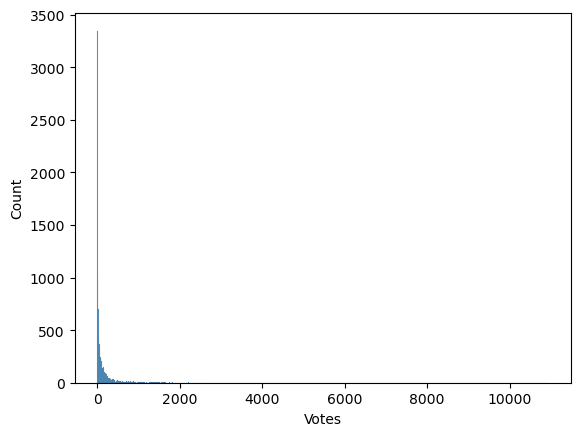

In [6]:
sns.histplot(data=df,x="Votes") #left-skewed

<Figure size 500x1500 with 0 Axes>

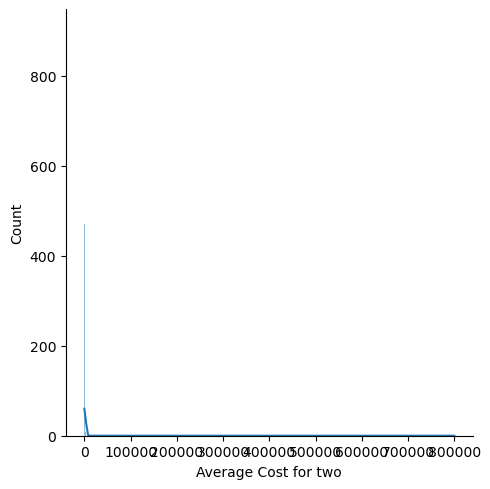

In [7]:
plt.figure(figsize=(5,15))
sns.displot(data=df,x="Average Cost for two",kde=True) #left-skewed

In [8]:
df.isnull().sum() #no null values

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

In [9]:
df['Cuisines'].unique()

array(['French, Japanese, Desserts', 'Japanese',
       'Seafood, Asian, Filipino, Indian', ..., 'Burger, Izgara',
       'World Cuisine, Patisserie, Cafe', 'Italian, World Cuisine'],
      dtype=object)

In [10]:
[features for features in df.columns if df[features].isnull().sum()>0]

['Cuisines']

<Axes: >

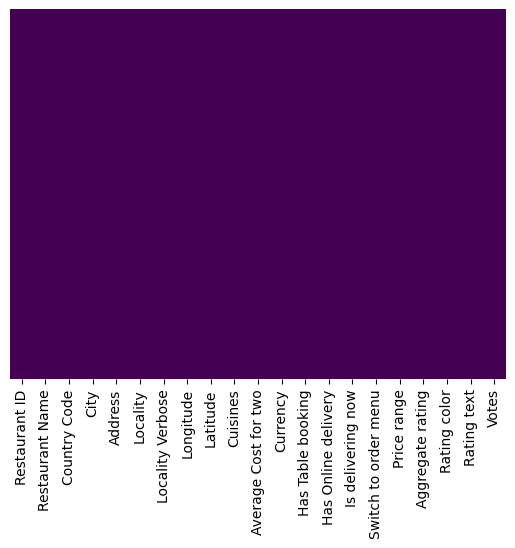

In [11]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [12]:
df_country=pd.read_excel("Country-Code.xlsx")

In [13]:
df_country.head()

,Country Code,Country
0,1,India
1,14,Australia
2,30,Brazil
3,37,Canada
4,94,Indonesia


In [14]:
final_df=pd.merge(df,df_country,on="Country Code",how="left")

In [15]:
final_df.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Yes,No,No,No,3,4.8,Dark Green,Excellent,314,Phillipines
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Yes,No,No,No,3,4.5,Dark Green,Excellent,591,Phillipines
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Yes,No,No,No,4,4.4,Green,Very Good,270,Phillipines
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,No,No,No,No,4,4.9,Dark Green,Excellent,365,Phillipines
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Yes,No,No,No,4,4.8,Dark Green,Excellent,229,Phillipines


In [16]:
City=df['City'].unique()

In [17]:
idx=np.where(df['Cuisines'].isnull())
idx

(array([ 84,  87,  94, 297, 328, 346, 368, 418, 455], dtype=int64),)

In [18]:
City=df.iloc[idx]['City']

In [19]:
for cities in City:
    ind=np.where(df['City']==cities)
    #print(df.iloc[ind]['City'])
    print(df.iloc[ind]['Cuisines'])
        

82             BBQ, Burger, Seafood
83                    American, BBQ
84                              NaN
85                          Mexican
86         Coffee and Tea, Sandwich
87                              NaN
88                        Fast Food
89       Asian, Chinese, Vegetarian
90        Pizza, Bar Food, Sandwich
91           Steak, Tapas, Bar Food
92     Chinese, Seafood, Vegetarian
93                          Chinese
94                              NaN
95       American, Burger, Sandwich
96                  American, Steak
97           Japanese, Steak, Sushi
98           Japanese, Steak, Sushi
99         Seafood, Tapas, Bar Food
100                  Italian, Pizza
101      American, Breakfast, Diner
Name: Cuisines, dtype: object
82             BBQ, Burger, Seafood
83                    American, BBQ
84                              NaN
85                          Mexican
86         Coffee and Tea, Sandwich
87                              NaN
88                        Fast Foo

In [20]:
City

84             Albany
87             Albany
94             Albany
297       Gainesville
328             Macon
346            Miller
368           Orlando
418    Rest of Hawaii
455          Savannah
Name: City, dtype: object

In [21]:
df['Cuisines'].value_counts()

Cuisines
North Indian                                             936
North Indian, Chinese                                    511
Chinese                                                  354
Fast Food                                                354
North Indian, Mughlai                                    334
                                                        ... 
Bengali, Fast Food                                         1
North Indian, Rajasthani, Asian                            1
Chinese, Thai, Malaysian, Indonesian                       1
Bakery, Desserts, North Indian, Bengali, South Indian      1
Italian, World Cuisine                                     1
Name: count, Length: 1825, dtype: int64

In [22]:
df.shape

(9551, 21)

In [23]:
df[df['Cuisines']=='North Indian']

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
626,3400005,Time2Eat - Mama Chicken,1,Agra,"Main Market, Sadar Bazaar, Agra Cantt, Agra",Agra Cantt,"Agra Cantt, Agra",78.011608,27.160832,North Indian,...,Indian Rupees(Rs.),No,No,No,No,2,3.6,Yellow,Good,94
680,2400052,Eat On,1,Allahabad,"Palace Compound, Near Palace Cinema, MG Marg, ...",Civil Lines,"Civil Lines, Allahabad",81.834236,25.450377,North Indian,...,Indian Rupees(Rs.),No,No,No,No,1,3.7,Yellow,Good,105
686,2200078,Charming Chicken,1,Amritsar,"Shop 3, Opposite Nari Nikaten, Majithia Road, ...",Basant Nagar,"Basant Nagar, Amritsar",74.884384,31.644532,North Indian,...,Indian Rupees(Rs.),No,No,No,No,1,3.9,Yellow,Good,151
690,2200067,Bubby Fish & Chicken Corner,1,Amritsar,"Near Crystal Chowk, Cooper Road, INA Colony, A...",INA Colony,"INA Colony, Amritsar",74.875828,31.635671,North Indian,...,Indian Rupees(Rs.),No,No,No,No,1,3.5,Yellow,Good,91
699,2200132,Brothers Dhaba,1,Amritsar,"Golden Temple Out Road, Opposite Amritsar Muni...",Town Hall,"Town Hall, Amritsar",74.877666,31.625981,North Indian,...,Indian Rupees(Rs.),No,No,No,No,2,3.8,Yellow,Good,276
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9148,18378803,#Dilliwaala6,1,Puducherry,"6, Rue De La Marine, White Town, Puducherry",White Town,"White Town, Puducherry",79.834810,11.936532,North Indian,...,Indian Rupees(Rs.),No,No,No,No,3,3.7,Yellow,Good,124
9173,18441490,Barbeque Ville,1,Pune,"257, Green Valley, Near Mankar Chowk, Kaspate ...",Wakad,"Wakad, Pune",73.773572,18.592718,North Indian,...,Indian Rupees(Rs.),Yes,No,No,No,3,4.4,Green,Very Good,208
9227,3200002,Gazebo Garden Restaurant,1,Vadodara,"Opposite FGI, Near Iscon Harmony, Sevasi-Bhimp...",Panchvati,"Panchvati, Vadodara",0.000000,0.000000,North Indian,...,Indian Rupees(Rs.),No,No,No,No,3,3.5,Yellow,Good,82
9241,3900250,Baati Chokha,1,Varanasi,"Anand Mandir Cinema, Telibagh, Dashaswmedh Roa...",Dashaswmedh Road,"Dashaswmedh Road, Varanasi",0.000000,0.000000,North Indian,...,Indian Rupees(Rs.),No,No,No,No,2,3.7,Yellow,Good,68


In [24]:
df[df['Cuisines']=='North Indian, Chinese']

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
668,2400193,Dewsis,1,Allahabad,"2, MG Marg, Opposite Hanuman Mandir, Civil Lin...",Civil Lines,"Civil Lines, Allahabad",0.000000,0.000000,"North Indian, Chinese",...,Indian Rupees(Rs.),No,No,No,No,3,3.4,Orange,Average,99
669,2400027,Friends Forever,1,Allahabad,"13/13, Sardar Patel Marg, Civil Lines, Allahabad",Civil Lines,"Civil Lines, Allahabad",81.835585,25.457687,"North Indian, Chinese",...,Indian Rupees(Rs.),No,No,No,No,3,3.4,Orange,Average,83
676,2400017,Tandoor Restaurant,1,Allahabad,"17/33, Mahatama Gandhi Marg, Civil Lines, Alla...",Civil Lines,"Civil Lines, Allahabad",81.860187,25.443994,"North Indian, Chinese",...,Indian Rupees(Rs.),No,No,No,No,3,3.2,Orange,Average,151
685,2200011,Makhan Fish and Chicken Corner,1,Amritsar,"21-A, Near Madaan Hospital, Majitha Road, Basa...",Basant Nagar,"Basant Nagar, Amritsar",74.884359,31.643620,"North Indian, Chinese",...,Indian Rupees(Rs.),No,No,No,No,2,3.4,Orange,Average,345
694,2200283,Sakhis Watz Kukin,1,Amritsar,"M 47, Green Avenue, opp Main Park, Amritsar",Ranjit Avenue,"Ranjit Avenue, Amritsar",74.864910,31.646689,"North Indian, Chinese",...,Indian Rupees(Rs.),No,No,No,No,2,3.6,Yellow,Good,51
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9174,2700001,Hot Lips,1,Ranchi,"Near Chandini Chowk, Kanke Road, Gandhi Nagar,...",Gandhi Nagar,"Gandhi Nagar, Ranchi",85.316842,23.416792,"North Indian, Chinese",...,Indian Rupees(Rs.),No,No,No,No,3,3.3,Orange,Average,65
9181,2700002,Moti Mahal Delux Tandoori Trail,1,Ranchi,"Lower Ground Floor Karni Heights, Beside Milan...",Kadru,"Kadru, Ranchi",85.326967,23.353783,"North Indian, Chinese",...,Indian Rupees(Rs.),No,No,No,No,3,3.6,Yellow,Good,119
9185,2700242,Food Belle,1,Ranchi,"Bhaskar Anirudh Complex, Near Jail More, Karam...",Lalpur,"Lalpur, Ranchi",0.000000,0.000000,"North Indian, Chinese",...,Indian Rupees(Rs.),No,No,No,No,2,3.3,Orange,Average,20
9194,96814,Saffron Mantra,1,Secunderabad,"The Purple Leaf Hotel, Karkhana, Secunderabad",Karkhana,"Karkhana, Secunderabad",78.500366,17.458998,"North Indian, Chinese",...,Indian Rupees(Rs.),Yes,Yes,No,No,2,4.4,Green,Very Good,494


In [25]:
[df.loc[:,'Aggregate rating'].min(),df.loc[:,'Aggregate rating'].max()]

[0.0, 4.9]

In [26]:
#df.loc[df['Aggregate rating']<1.0,'Aggregate rating']=0
#df.loc[df['Aggregate rating']<2.0,'Aggregate rating']=1
#df.loc[df['Aggregate rating']<3.0,'Aggregate rating']=2
#df.loc[df['Aggregate rating']<4.0,'Aggregate rating']=3
#df.loc[df['Aggregate rating']<5.0,'Aggregate rating']=4

In [27]:
country_name=final_df['Country'].value_counts().index

In [28]:
country_val=final_df['Country'].value_counts().values

([<matplotlib.patches.Wedge at 0x21029811070>,
 [Text(-1.0829742700952103, 0.19278674827836725, 'India'),
  Text(1.077281715838356, -0.22240527134123297, 'United States'),
  Text(1.0995865153823035, -0.03015783794312073, 'United Kingdom')],
 [Text(-0.590713238233751, 0.10515640815183668, '94.39%'),
  Text(0.5876082086391032, -0.12131196618612707, '4.73%'),
  Text(0.5997744629358018, -0.01644972978715676, '0.87%')])

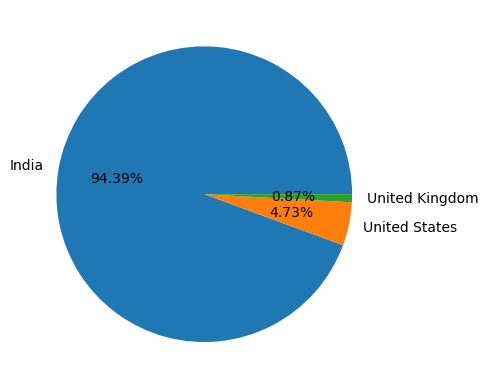

In [29]:
plt.pie(country_val[:3],labels=country_name[:3],autopct="%1.2f%%")

In [30]:
ratings=final_df.groupby(['Aggregate rating','Rating color','Rating text']).size().reset_index().rename(columns={0:'Rating Count'})

In [31]:
ratings

,Aggregate rating,Rating color,Rating text,Rating Count
0,0.0,White,Not rated,2148
1,1.8,Red,Poor,1
2,1.9,Red,Poor,2
3,2.0,Red,Poor,7
4,2.1,Red,Poor,15
5,2.2,Red,Poor,27
6,2.3,Red,Poor,47
7,2.4,Red,Poor,87
8,2.5,Orange,Average,110
9,2.6,Orange,Average,191


<Axes: xlabel='Aggregate rating', ylabel='Rating Count'>

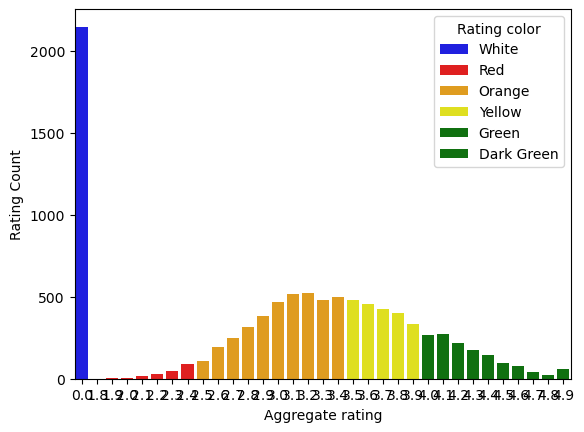

In [32]:
sns.barplot(x="Aggregate rating",y="Rating Count",data=ratings,hue="Rating color",palette=['blue','red','orange','yellow','green','green'])

In [75]:
final_df['Country'][final_df['Aggregate rating']==0.0].value_counts()

Country
India             2139
Brazil               5
United States        3
United Kingdom       1
Name: count, dtype: int64

In [95]:
final_df[['Country','Currency']].groupby(['Country','Currency']).size().reset_index()

,Country,Currency,0
0,Australia,Dollar($),24
1,Brazil,Brazilian Real(R$),60
2,Canada,Dollar($),4
3,India,Indian Rupees(Rs.),8652
4,Indonesia,Indonesian Rupiah(IDR),21
5,New Zealand,NewZealand($),40
6,Phillipines,Botswana Pula(P),22
7,Qatar,Qatari Rial(QR),20
8,Singapore,Dollar($),20
9,South Africa,Rand(R),60


In [97]:
final_df.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes', 'Country'],
      dtype='object')

In [103]:
final_df[final_df['Has Online delivery']=='Yes'].groupby('Country').size()

Country
India    2423
UAE        28
dtype: int64

In [109]:
final_df.groupby('Country').size()

Country
Australia           24
Brazil              60
Canada               4
India             8652
Indonesia           21
New Zealand         40
Phillipines         22
Qatar               20
Singapore           20
South Africa        60
Sri Lanka           20
Turkey              34
UAE                 60
United Kingdom      80
United States      434
dtype: int64

In [115]:
final_df[['Has Online delivery','Country']].groupby(['Has Online delivery','Country']).size()

Has Online delivery  Country       
No                   Australia           24
                     Brazil              60
                     Canada               4
                     India             6229
                     Indonesia           21
                     New Zealand         40
                     Phillipines         22
                     Qatar               20
                     Singapore           20
                     South Africa        60
                     Sri Lanka           20
                     Turkey              34
                     UAE                 32
                     United Kingdom      80
                     United States      434
Yes                  India             2423
                     UAE                 28
dtype: int64

In [117]:
city_name=final_df['City'].value_counts().index

In [119]:
city_values=final_df['City'].value_counts().values

([<matplotlib.patches.Wedge at 0x2103d713f20>,
 [Text(-0.6145352824185932, 0.9123301960708633, 'New Delhi'),
  Text(0.0623675251198054, -1.0982305276263407, 'Gurgaon'),
  Text(0.8789045225625368, -0.6614581167535246, 'Noida'),
  Text(1.0922218418223437, -0.13058119407559224, 'Faridabad'),
  Text(1.099946280005612, -0.010871113182029924, 'Ghaziabad')],
 [Text(-0.3352010631374145, 0.497634652402289, '68.87%'),
  Text(0.0340186500653484, -0.5990348332507311, '14.07%'),
  Text(0.47940246685229276, -0.36079533641101336, '13.59%'),
  Text(0.5957573682667329, -0.07122610585941394, '3.16%'),
  Text(0.5999706981848791, -0.005929698099289049, '0.31%')])

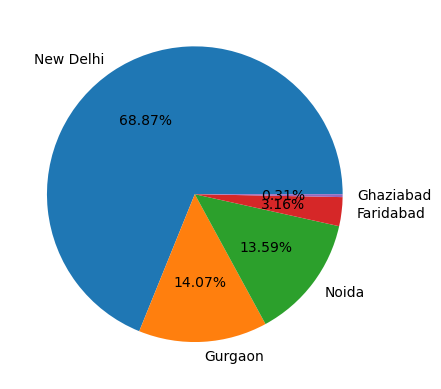

In [133]:
plt.pie(city_values[:5],labels=city_name[:5],autopct='%1.2f%%')

In [139]:
cuisines_name=final_df['Cuisines'].value_counts().index
cuisines_value=final_df['Cuisines'].value_counts().values

([<matplotlib.patches.Wedge at 0x2103d701220>,
 [Text(0.4175823090707363, 1.0176566292965188, 'North Indian'),
  Text(-1.090169487983684, 0.14673270756512372, 'North Indian, Chinese'),
  Text(-0.6326704341218391, -0.8998489438722946, 'Chinese'),
  Text(0.3048764124205039, -1.0569060379946758, 'Fast Food'),
  Text(1.0036916287969155, -0.45011455684413826, 'North Indian, Mughlai')])

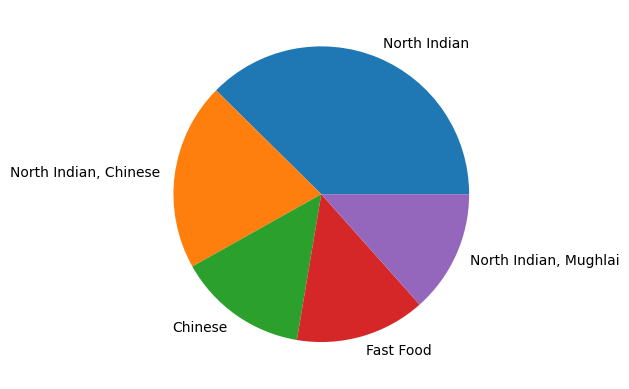

In [141]:
plt.pie(cuisines_value[:5],labels=cuisines_name[:5])

In [172]:
final_df['Country'][final_df['Cuisines']=='Chinese'].value_counts()

Country
India            340
United States      9
Phillipines        1
UAE                1
New Zealand        1
Qatar              1
Sri Lanka          1
Name: count, dtype: int64

In [174]:
final_df['Country'][final_df['Cuisines'].isnull()]

84     United States
87     United States
94     United States
297    United States
328    United States
346    United States
368    United States
418    United States
455    United States
Name: Country, dtype: object

In [176]:
final_df['Cuisines'][final_df['Country']=='United States'].value_counts()

Cuisines
Mexican                          25
American                         16
BBQ                               9
Chinese                           9
Seafood                           8
                                 ..
Desserts, Pizza, Ice Cream        1
International, Pizza              1
Breakfast, Pizza                  1
American, Burger, Pizza, Cafe     1
Burger, Greek, Sandwich           1
Name: count, Length: 229, dtype: int64

<Axes: xlabel='Cuisines', ylabel='Aggregate rating'>

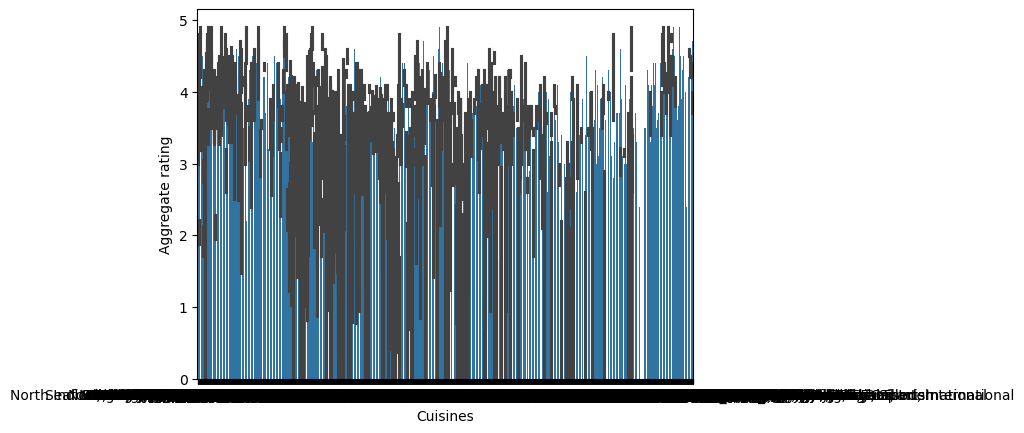

In [180]:
sns.barplot(x="Cuisines",y="Aggregate rating",data=final_df)